Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas
depressivos nos EUA no período de 2005-2006?

Hábitos saudáveis de alimentação e atividade física estão associados a
menores índices de depressão nesta população?

# **Importações**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kendalltau, spearmanr

# **Conhecendo o DataFrame - Demo**

In [2]:
demo = pd.read_csv('/Users/joaoaroca/Documents/Portfólio/depressao/portfolio/DEMO_PHQ.csv')

## **Dicionário das Variáveis**

* **SEQN:** Identificador único do respondente.

* **DPQ010:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você ficou incomodado por ter pouco interesse ou pouco prazer em fazer as coisas?

    * **Valores:**
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ020:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu para baixo, deprimido(a) ou sem perspectiva?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ030:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ040:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu cansado(a) ou com pouca energia?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ050:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você sentiu falta de apetite ou comeu demais?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ060**:

    * **Descrição:** Nas últimas 2 semanas, com que frequência você se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe
* **DPQ070:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ080:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **DPQ090:**

    * **Descrição:** Nas últimas 2 semanas, com que frequência você pensou em se ferir de alguma maneira ou que seria melhor estar morto(a)?
    
    * **Valores:** 
        * 0: Nenhuma vez
        * 1: Menos de uma semana
        * 2: Uma semana ou mais
        * 3: Quase todos os dias
        * 7: Se recusou a responder
        * 9: Não sabe

* **RIAGENDR:**

    * **Descrição:** Gênero
    * **Valores:**
        * 1: Masculino
        * 2: Feminino

* **RIDAGEYR:**

    * **Descrição:** Idade em anos

* **RIDRETH1:**

    * **Descrição:** Raça/Etnia
    * **Valores:**

        * 1: Branco não-hispânico
        * 2: Negro não-hispânico
        * 3: Mexicano-americano
        * 4: Outro
        * 5: Outro - Hispânico

* **DMDEDUC:**

    * **Descrição:** Escolaridade
    * **Valores:**
        * 1: Menor que 9o ano
        * 2: 9-12o ano
        * 3: Ensino médio
        * 4: Ensino superior incompleto
        * 5: Superior completo ou maior
        * 7: Se recusou a responder
        * 9: Não sabe

* **INDFMINC:**

    * **Descrição:** Renda anual familiar (US$)
    * **Valores:**
        * 1: 0-4999
        * 2: 5000-9999
        * 3: 10000-14999
        * 4: 15000-19999
        * 5: 20000-24999
        * 6: 25000-34999
        * 7: 35000-44999
        * 8: 45000-54999
        * 9: 55000-64999
        * 10: 65000-74999
        * 11: Maior ou igual a 75000
        * 12: Maior que 20000
        * 13: Menor que 20000
        * 77: Se recusou a responder
        * 99: Não sabe

In [3]:
# Verificando as primeiras linhas do DataFrame
demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


Precisa-se de uma variável que 

In [5]:
demo.query('DPQ010 == 9')

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
1395,33959,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,81,3,2,2.0
1686,34531,9.0,0.0,3.0,3.0,3.0,0.0,0.0,9.0,0.0,1,81,3,1,4.0
2231,35522,9.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2,85,3,4,3.0
2518,36074,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,2,5,8.0
3240,37498,9.0,9.0,9.0,3.0,0.0,3.0,0.0,0.0,0.0,2,85,4,1,2.0
3639,38245,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,21,3,3,6.0
3767,38500,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,65,4,2,11.0
5092,41008,9.0,3.0,9.0,3.0,3.0,3.0,9.0,1.0,2.0,2,40,3,4,1.0
5114,41040,9.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,85,3,2,5.0


In [6]:
colunas = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']

demo[colunas] = demo[colunas].replace({7: 0, 9: 0})

demo['DPQ_SCORE'] = demo[colunas].sum(axis=1)

## **Limpeza dos dados**

In [7]:
# Veriricando a porcentagem de valores ausentes
demo.isnull().sum() / demo.shape[0] * 100

SEQN         0.000000
DPQ010       9.336333
DPQ020       9.336333
DPQ030       9.336333
DPQ040       9.336333
DPQ050       9.336333
DPQ060       9.336333
DPQ070       9.336333
DPQ080       9.336333
DPQ090       9.336333
RIAGENDR     0.000000
RIDAGEYR     0.000000
RIDRETH1     0.000000
DMDEDUC      0.000000
INDFMINC     0.881140
DPQ_SCORE    0.000000
dtype: float64

As colunas DPQ010 à DPQ090 apresentam uma quantidade significativa de valores nulos, portanto, deve-se análisar se os dados ausentes têm relação com alguma variável. Por estar interessado principalmente na presença e na direção de uma relação entre duas variáveis, independentemente da forma específica da relação, a correlação de Spearman ou de Kendall pode ser preferível. Portanto, será realizado ambos os testes para verificar se são aleatórias as ausencias de dados.

### Correlação de Kendall

In [8]:
# Criar variáveis indicadoras de ausência para as variáveis DPQ
for col in demo.columns:
    if col.startswith('DPQ'):
        demo[f'ausente_{col}'] = demo[col].isnull().astype(int)

# Variáveis de interesse
variaveis_interesse = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']

# Calcular a correlação de Kendall entre a presença de valores ausentes nas variáveis DPQ e as variáveis de interesse
correlacoes_kendall = {}
for col in demo.columns:
    if col.startswith('ausente_DPQ'):
        correlacoes_kendall[col] = {}
        for var in variaveis_interesse:
            tau, _ = kendalltau(demo[col], demo[var])
            correlacoes_kendall[col][var] = tau

# Converter o dicionário de correlações em um DataFrame para visualização
df_correlacoes_kendall = pd.DataFrame(correlacoes_kendall)

print(df_correlacoes_kendall)

          ausente_DPQ010  ausente_DPQ020  ausente_DPQ030  ausente_DPQ040  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.010756        0.010756        0.010756        0.010756   
RIDRETH1        0.036781        0.036781        0.036781        0.036781   
DMDEDUC        -0.057435       -0.057435       -0.057435       -0.057435   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ050  ausente_DPQ060  ausente_DPQ070  ausente_DPQ080  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.010756        0.010756        0.010756        0.010756   
RIDRETH1        0.036781        0.036781        0.036781        0.036781   
DMDEDUC        -0.057435       -0.057435       -0.057435       -0.057435   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ090  ausente_DPQ_SCORE  
RIAGENDR        0.011741                

### Correlação de Spearman

In [9]:
for col in demo.columns:
    if col.startswith('DPQ'):
        demo[f'ausente_{col}'] = demo[col].isnull().astype(int)

# Variáveis de interesse
variaveis_interesse = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']

# Calcular a correlação de Spearman entre a presença de valores ausentes nas variáveis DPQ e as variáveis de interesse
correlacoes_spearman = {}
for col in demo.columns:
    if col.startswith('ausente_DPQ'):
        correlacoes_spearman[col] = {}
        for var in variaveis_interesse:
            rho, _ = spearmanr(demo[col], demo[var])
            correlacoes_spearman[col][var] = rho

# Converter o dicionário de correlações em um DataFrame para visualização
df_correlacoes_spearman = pd.DataFrame(correlacoes_spearman)

print(df_correlacoes_spearman)

          ausente_DPQ010  ausente_DPQ020  ausente_DPQ030  ausente_DPQ040  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.013051        0.013051        0.013051        0.013051   
RIDRETH1        0.039521        0.039521        0.039521        0.039521   
DMDEDUC        -0.063881       -0.063881       -0.063881       -0.063881   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ050  ausente_DPQ060  ausente_DPQ070  ausente_DPQ080  \
RIAGENDR        0.011741        0.011741        0.011741        0.011741   
RIDAGEYR        0.013051        0.013051        0.013051        0.013051   
RIDRETH1        0.039521        0.039521        0.039521        0.039521   
DMDEDUC        -0.063881       -0.063881       -0.063881       -0.063881   
INDFMINC             NaN             NaN             NaN             NaN   

          ausente_DPQ090  ausente_DPQ_SCORE  
RIAGENDR        0.011741                

/var/folders/5b/94pzbwt93956n1sc6yjsyf2c0000gn/T/ipykernel_2147/359601840.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(demo[col], demo[var])


Como não apresentou forte correlação entre as variáveis, será realizada a limpeza dos valores nulos, para não prejuficar a análise. Está sendo considerado que os valores nulos apresentados no DataFrame são do tipo MCAR (Missing Completely At Random), ou seja, a probabilidade de um valor estar ausente é a mesma para todas as observações. Os valores ausentes são imprevisíveis e não podem ser explicados por nenhuma variável observada. A variável INDFMINC apresenta uma quantidade extremamente baixa de valores nulos, portanto, será removido os valores nulos também.

In [10]:
# Removendo as colunas que foram usadas na correlação
demo.drop(columns=['ausente_DPQ010', 'ausente_DPQ020',  'ausente_DPQ030', 'ausente_DPQ040', 'ausente_DPQ050', 'ausente_DPQ060',
       'ausente_DPQ070', 'ausente_DPQ080', 'ausente_DPQ090'], inplace= True)

In [11]:
# Removendo os valores nulos do DataFrame
demo.dropna(inplace=True)

## **Conhecendo o DataFrame - Pag**

In [12]:
pag = pd.read_csv('/Users/joaoaroca/Documents/Portfólio/depressao/portfolio/PAG_HEI.csv')

In [13]:
pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

Sabe-se que os dados do DataFrame "demo" já estão todos tratados para se utilizar na análise. Contudo, essa nova base de dados "pag" não foi verificado ainda se necessita de limpeza. Foi observado que o DataFrame "pag" possui 9424 registros, enquanto o DataFrame "demo" possui apenas 4800 registros. Então, faz muito mais sentido fazer a junção das tabelas, antes mesmo de verificar as irregularidades do DataFrame "pag", visto que não serão utilizados todos os dados, logo, não necessita de limpeza em toda base. 

In [14]:
df_unido = pd.merge(demo, pag, how='left', on='SEQN')

In [15]:
df_unido.isnull().sum() / len(df_unido) * 100

SEQN                        0.000000
DPQ010                      0.000000
DPQ020                      0.000000
DPQ030                      0.000000
DPQ040                      0.000000
DPQ050                      0.000000
DPQ060                      0.000000
DPQ070                      0.000000
DPQ080                      0.000000
DPQ090                      0.000000
RIAGENDR                    0.000000
RIDAGEYR                    0.000000
RIDRETH1                    0.000000
DMDEDUC                     0.000000
INDFMINC                    0.000000
DPQ_SCORE                   0.000000
ausente_DPQ_SCORE           0.000000
PAG_MINW                    0.000000
ADHERENCE                   0.000000
HEI2015C1_TOTALVEG          2.041667
HEI2015C2_GREEN_AND_BEAN    2.041667
HEI2015C3_TOTALFRUIT        2.041667
HEI2015C4_WHOLEFRUIT        2.041667
HEI2015C5_WHOLEGRAIN        2.041667
HEI2015C6_TOTALDAIRY        2.041667
HEI2015C7_TOTPROT           2.041667
HEI2015C8_SEAPLANT_PROT     2.041667
H

Após a junção dos DataFrames foi observado uma quantidade extremamente baixa de valores ausentes, por não possuir uma quantidade alta, serão removidos os valores ausentes. 

In [16]:
df_unido.dropna(inplace=True)

## **Análise Exploratória Univariada**

Será realizado a soma de DPQ010 à DPQ090 para obter um valor que possa representar o grau de sintomas depressivos. Como o valor 7 representa que a pessoa se recusou a responder e o valor 9 significa que a pessoa não sabe, serão alterados para 0, para não influenciarem no Score.

In [17]:
# Separando as coluans
colunas = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']

# Substituindo os valores de 7 e 9 por 0
df_unido[colunas] = df_unido[colunas].replace({7: 0, 9: 0})

# Realizando a soma das colunas
df_unido['DPQ_SCORE'] = df_unido[colunas].sum(axis=1)

Será criada a coluna CATEGORY que representará o grau de sintomas depressivos conforme descrito abaixo:

* 0 ("sem sintomas") se DPQ_SCORE < 5

* 1 ("sintomas leves") se 5 <= DPQ_SCORE < 10

* 2 ("sintomas moderados a severos") se DPQ_SCORE >= 10

In [18]:
# Criando a coluna CATEGORY com base no valor de DPQ_SCORE
df_unido['CATEGORY'] = df_unido['DPQ_SCORE'].apply(lambda x: 0 if x < 5 else (1 if x < 10 and x >= 5 else 2))

In [19]:
# Verificando se criou corretamente para os valores de DPQ_SCORE < 5
df_unido['CATEGORY'].loc[df_unido['DPQ_SCORE'] < 5].value_counts()

CATEGORY
0    3726
Name: count, dtype: int64

In [20]:
# Verificando se criou corretamente para os valores de DPQ_SCORE < 10 e >= 5
df_unido['CATEGORY'].loc[(df_unido['DPQ_SCORE'] < 10) & (df_unido['DPQ_SCORE'] >= 5)].value_counts()

CATEGORY
1    684
Name: count, dtype: int64

In [21]:
# Verificando se criou corretamente para os valores de DPQ_SCORE >= 10
df_unido['CATEGORY'].loc[df_unido['DPQ_SCORE']>= 10].value_counts()

CATEGORY
2    292
Name: count, dtype: int64

### **Variáveis Categóricas**

In [22]:
df_unido

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,CATEGORY
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,0
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,0
4796,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,...,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,2
4797,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,0
4798,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0


Text(0, 0.5, 'Contagem')

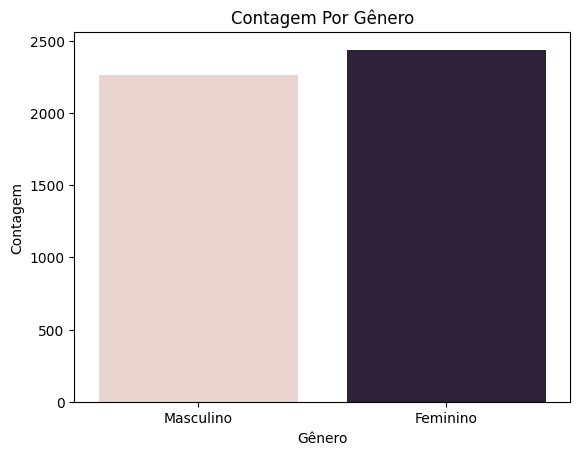

In [40]:
# Plotar o gráfico de barras com rótulos personalizados
grafico = sns.countplot(x='RIAGENDR', data=df_unido, hue='RIAGENDR', legend= False)
plt.xticks([0, 1], ['Masculino', 'Feminino'])
grafico.set_title('Contagem Por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')


([<matplotlib.axis.XTick at 0x16e374cd0>,
 [Text(0, 0, 'Mexicano-americano'),
  Text(1, 0, 'Outro'),
  Text(2, 0, 'Branco'),
  Text(3, 0, 'Outro - Hispânico'),
  Text(4, 0, 'Negro')])

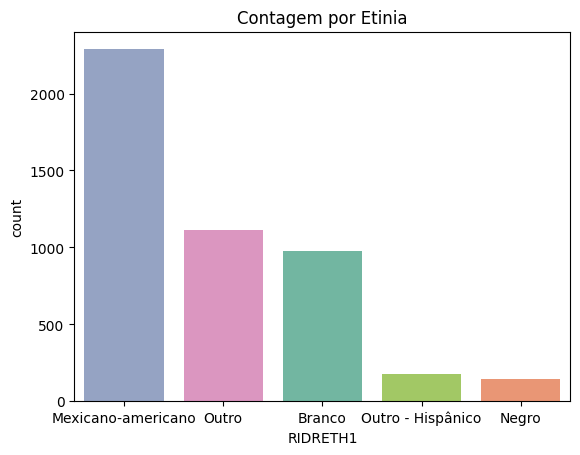

In [26]:
# Contar as ocorrências de cada valor em 'RIDRETH1' e ordenar de forma decrescente
ordem = df_unido['RIDRETH1'].value_counts().index

# Mapear os valores únicos de 'RIDRETH1' para as etnias correspondentes
etinia = {
    1: 'Branco',
    2: 'Negro',
    3: 'Mexicano-americano',
    4: 'Outro',
    5: 'Outro - Hispânico'
}

# Criar uma lista de rótulos com apenas as etnias
formatar_labels = [etinia[value] for value in ordem]

# Plotar o gráfico de barras com os valores ordenados
grafico = sns.countplot(x='RIDRETH1', data=df_unido, hue='RIDRETH1', order=ordem, palette="Set2", legend=False)

# Alterando o título
grafico.set_title('Contagem por Etinia')

# Definir os rótulos formatados para os ticks do eixo x
plt.xticks(ticks=range(len(ordem)), labels=formatar_labels)

([<matplotlib.axis.XTick at 0x298706980>,
 [Text(0, 0, 'Ensino superior incompleto'),
  Text(1, 0, 'Ensino médio'),
  Text(2, 0, 'Superior completo ou maior'),
  Text(3, 0, '9-12º ano'),
  Text(4, 0, 'Menor que 9º ano'),
  Text(5, 0, 'Não sabe')])

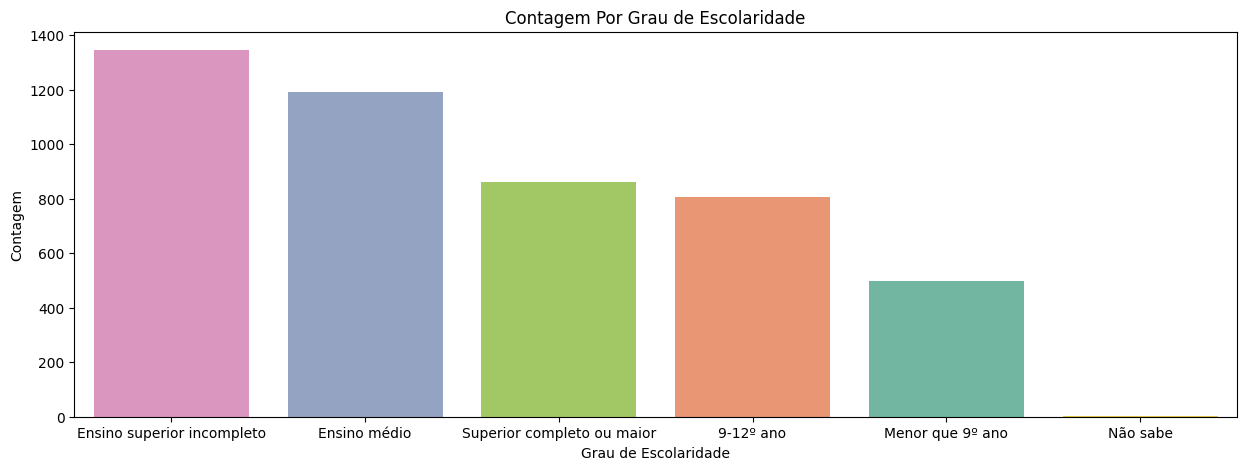

In [44]:
# Criando um dicionário com os valores correspondentes de escolaridade
escolaridade = {
    1: 'Menor que 9º ano',
    2: '9-12º ano',
    3: 'Ensino médio',
    4: 'Ensino superior incompleto',
    5: 'Superior completo ou maior',
    7: 'Se recusou a responder',
    9: 'Não sabe'

}

# Obetendo a ordem decrescente dos níveis de escolaridade
ordem =  df_unido['DMDEDUC'].value_counts().index

# Buscando em ordem as escolaridades
formatar_labels = [escolaridade[value] for value in ordem]

# Adicionando um tamanho à figura
plt.figure(figsize=(15, 5))

# Adicionando Título
plt.title('Contagem Por Grau de Escolaridade')

# Legenda do eixo x
plt.xlabel('Grau de Escolaridade')

# Legenda do eixo y
plt.ylabel('Contagem')

# Criando o gráfico
grafico = sns.countplot(x='DMDEDUC', data=df_unido, hue='DMDEDUC', order=ordem, palette="Set2", legend=False)

# Definir os rótulos formatados para os ticks do eixo x
plt.xticks(ticks=range(len(ordem)), labels=formatar_labels)

* **INDFMINC:**

    * **Descrição:** Renda anual familiar (US$)
    * **Valores:**
        * 1: 0-4999
        * 2: 5000-9999
        * 3: 10000-14999
        * 4: 15000-19999
        * 5: 20000-24999
        * 6: 25000-34999
        * 7: 35000-44999
        * 8: 45000-54999
        * 9: 55000-64999
        * 10: 65000-74999
        * 11: Maior ou igual a 75000
        * 12: Maior que 20000
        * 13: Menor que 20000
        * 77: Se recusou a responder
        * 99: Não sabe

([<matplotlib.axis.XTick at 0x2995444c0>,
 [Text(0, 0, '>= 75000'),
  Text(1, 0, '25000-34999'),
  Text(2, 0, '35000-44999'),
  Text(3, 0, '45000-54999'),
  Text(4, 0, '10000-14999'),
  Text(5, 0, '20000-24999'),
  Text(6, 0, '15000-19999'),
  Text(7, 0, '55000-64999'),
  Text(8, 0, '65000-74999'),
  Text(9, 0, '5000-9999'),
  Text(10, 0, '0-4999'),
  Text(11, 0, '> 20000'),
  Text(12, 0, 'Não sabe'),
  Text(13, 0, 'Não respondeu'),
  Text(14, 0, '< 20000')])

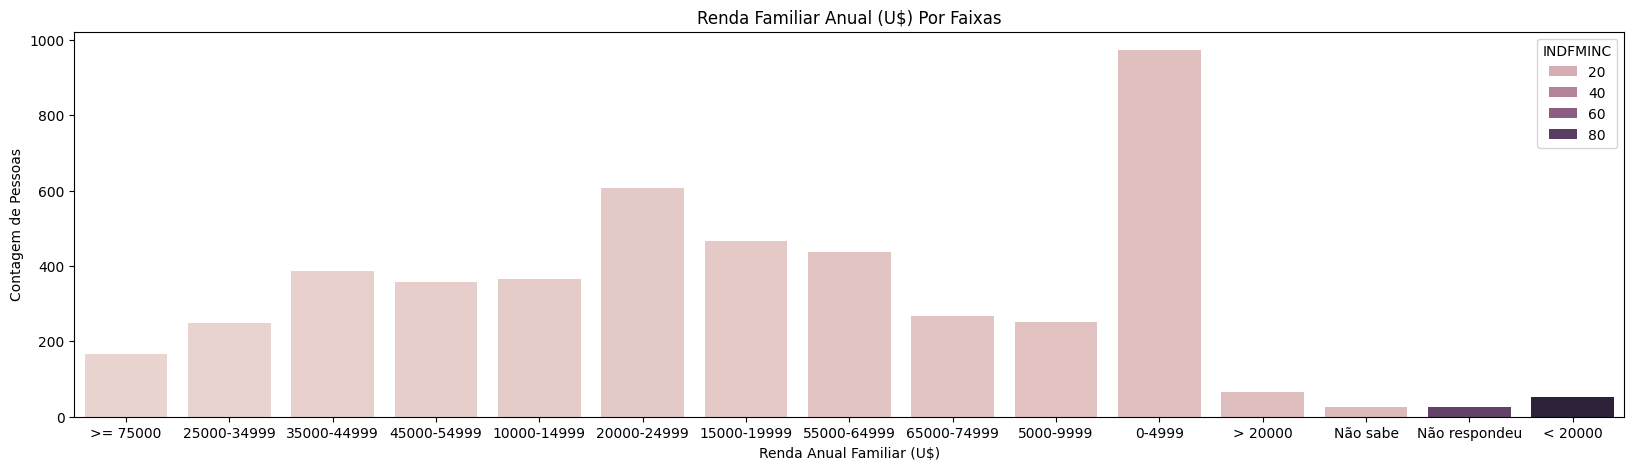

In [68]:
rendas = {
    1: '0-4999',
    2: '5000-9999',
    3: '10000-14999',
    4: '15000-19999',
    5: '20000-24999',
    6: '25000-34999',
    7: '35000-44999',
    8: '45000-54999',
    9: '55000-64999',
    10: '65000-74999',
    11: '>= 75000',
    12: '> 20000',
    13: '< 20000',
    77: 'Não respondeu',
    99: 'Não sabe'
}

ordem = df_unido['INDFMINC'].value_counts().index

formatar_labels = [rendas[value] for value in ordem]

# Definindo o tamanho
plt.figure(figsize=(20,5))

# Criando gráfico
grafico = sns.countplot(x='INDFMINC', data=df_unido, hue='INDFMINC')

# Definindo o título
plt.title('Renda Familiar Anual (U$) Por Faixas')

# Legenda eixo x
plt.xlabel('Renda Anual Familiar (U$)')

# Legenda eixo y
plt.ylabel('Contagem de Pessoas')

# Definindo os rótulos formatados para os ticks do eixo x
plt.xticks(ticks= range(len(ordem)), labels=formatar_labels)

# Preciso corrigir as cores!!!!!!!!!!!